In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.preprocessing import StandardScaler
import catboost

# EDA

## Basic *

In [2]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")
train.head(5)

,id,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,0,Pascoe Vale,1/22 Archibald St,3,t,900000.0,S,Nelson,12/08/2017,8.5,...,2.0,1.0,0.0,149.0,2014.0,Moreland City Council,-37.72882,144.93301,Northern Metropolitan,7485.0
1,1,Northcote,3 Lorna Av,2,h,1800000.0,S,McGrath,18/03/2017,5.5,...,NaN,NaN,NaN,NaN,NaN,Darebin City Council,NaN,NaN,Northern Metropolitan,11364.0
2,2,Aspendale,75 Laura St,3,h,988000.0,S,Biggin,23/09/2017,21.5,...,NaN,NaN,NaN,NaN,NaN,Kingston City Council,NaN,NaN,South-Eastern Metropolitan,2824.0
3,3,Ormond,2 Stewart St,3,h,940000.0,PI,Buxton,16/07/2016,11.8,...,1.0,1.0,397.0,124.0,1940.0,Glen Eira City Council,-37.90640,145.02910,Southern Metropolitan,3578.0
4,4,Coburg,171 The Avenue,3,h,1035000.0,S,Nelson,24/02/2018,6.7,...,1.0,2.0,375.0,169.0,1930.0,Darebin City Council,-37.75339,144.97687,Northern Metropolitan,11204.0


In [3]:
train.shape

(13623, 22)

In [4]:
train.columns

Index(['id', 'Suburb', 'Address', 'Rooms', 'Type', 'Price', 'Method',
       'SellerG', 'Date', 'Distance', 'Postcode', 'Bedroom2', 'Bathroom',
       'Car', 'Landsize', 'BuildingArea', 'YearBuilt', 'CouncilArea',
       'Lattitude', 'Longtitude', 'Regionname', 'Propertycount'],
      dtype='object')

In [5]:
test.columns

Index(['id', 'Suburb', 'Address', 'Rooms', 'Type', 'Method', 'SellerG', 'Date',
       'Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Car', 'Landsize',
       'BuildingArea', 'YearBuilt', 'CouncilArea', 'Lattitude', 'Longtitude',
       'Regionname', 'Propertycount'],
      dtype='object')

## Giá trị thiếu

In [6]:
train.isna().sum()

id                  0
Suburb              0
Address             0
Rooms               0
Type                0
Price               0
Method              0
SellerG             0
Date                0
Distance            0
Postcode            0
Bedroom2         3191
Bathroom         3195
Car              3380
Landsize         4661
BuildingArea     8356
YearBuilt        7619
CouncilArea         0
Lattitude        3105
Longtitude       3105
Regionname          0
Propertycount       0
dtype: int64

## Price *

In [7]:
(train['Price']/1e4).describe()

count    13623.000000
mean       104.799678
std         63.552735
min          8.500000
25%         63.700000
50%         87.000000
75%        128.500000
max        800.000000
Name: Price, dtype: float64

C:\Users\XPS\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Price', ylabel='Density'>

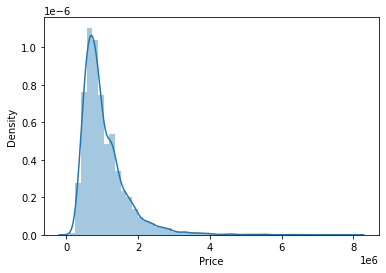

In [8]:
sns.distplot(train['Price'])

## BuildingArea *

In [9]:
train['BuildingArea'].describe()

count    5267.000000
mean      150.446832
std       124.617794
min         0.000000
25%       100.000000
50%       132.000000
75%       180.000000
max      6791.000000
Name: BuildingArea, dtype: float64

C:\Users\XPS\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='BuildingArea', ylabel='Density'>

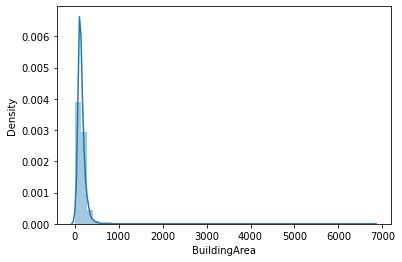

In [10]:
sns.distplot(train.BuildingArea)

Có một số dữ liệu nhiễu cần phải loại bỏ.

C:\Users\XPS\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='BuildingArea', ylabel='Density'>

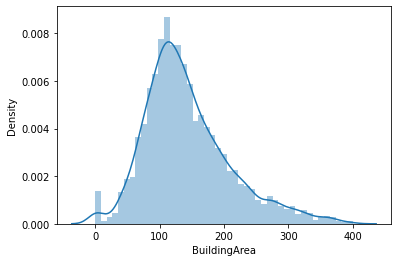

In [12]:
sns.distplot(train[train['BuildingArea']<=400].BuildingArea)

<AxesSubplot:xlabel='BuildingArea', ylabel='Price'>

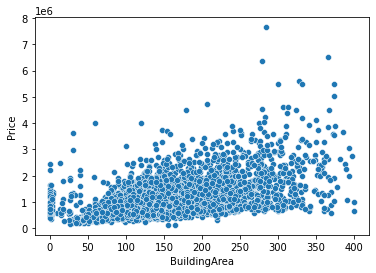

In [13]:
sns.scatterplot(x='BuildingArea',y='Price',data=train[train['BuildingArea']<=400])

## YearBuilt

In [15]:
train['YearBuilt'].isna().sum()

7619

<AxesSubplot:xlabel='YearBuilt', ylabel='count'>

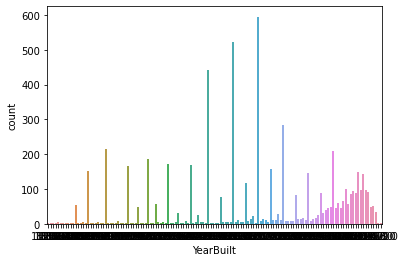

In [16]:
sns.countplot(x='YearBuilt',data=train)

<AxesSubplot:xlabel='YearBuilt', ylabel='Price'>

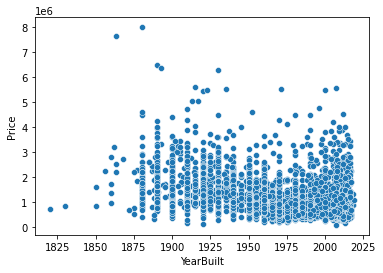

In [17]:
sns.scatterplot(x='YearBuilt',y='Price',data=train)

## CouncilArea

<AxesSubplot:xlabel='CouncilArea', ylabel='Price'>

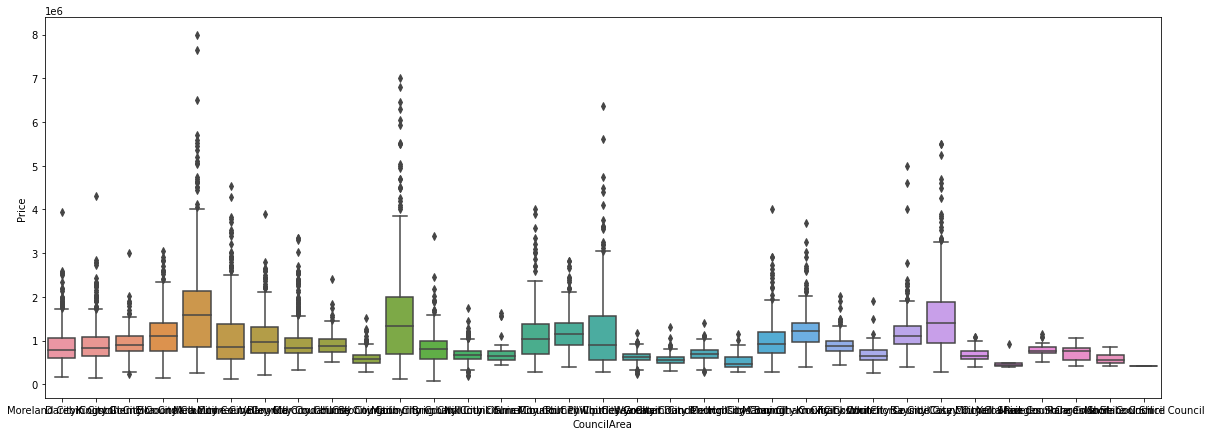

In [23]:
plt.figure(figsize=(20,7))
sns.boxplot(x='CouncilArea',y='Price',data=train)

## Regionname

<AxesSubplot:xlabel='Regionname', ylabel='Price'>

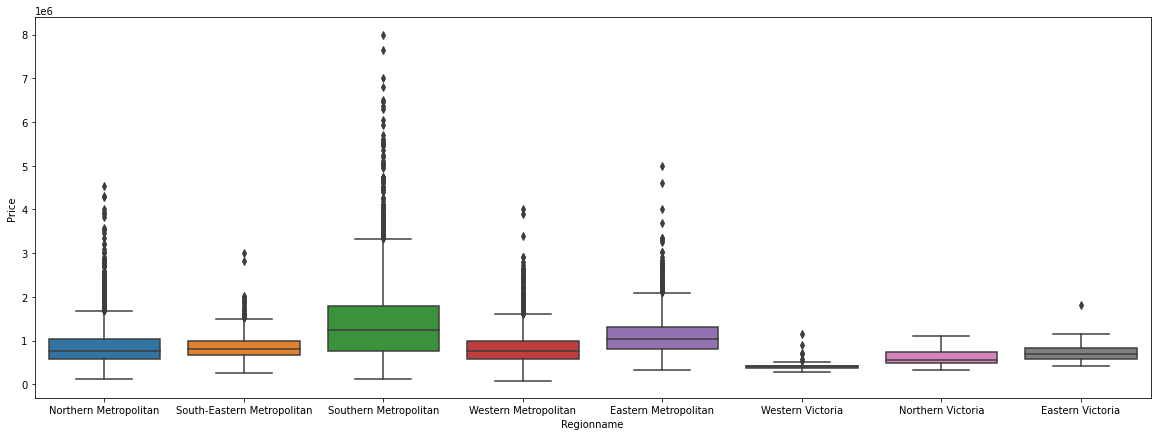

In [22]:
plt.figure(figsize=(20,7))
sns.boxplot(x='Regionname',y='Price',data=train)

## Longtitude & Lattitude *

<AxesSubplot:xlabel='Longtitude', ylabel='Lattitude'>

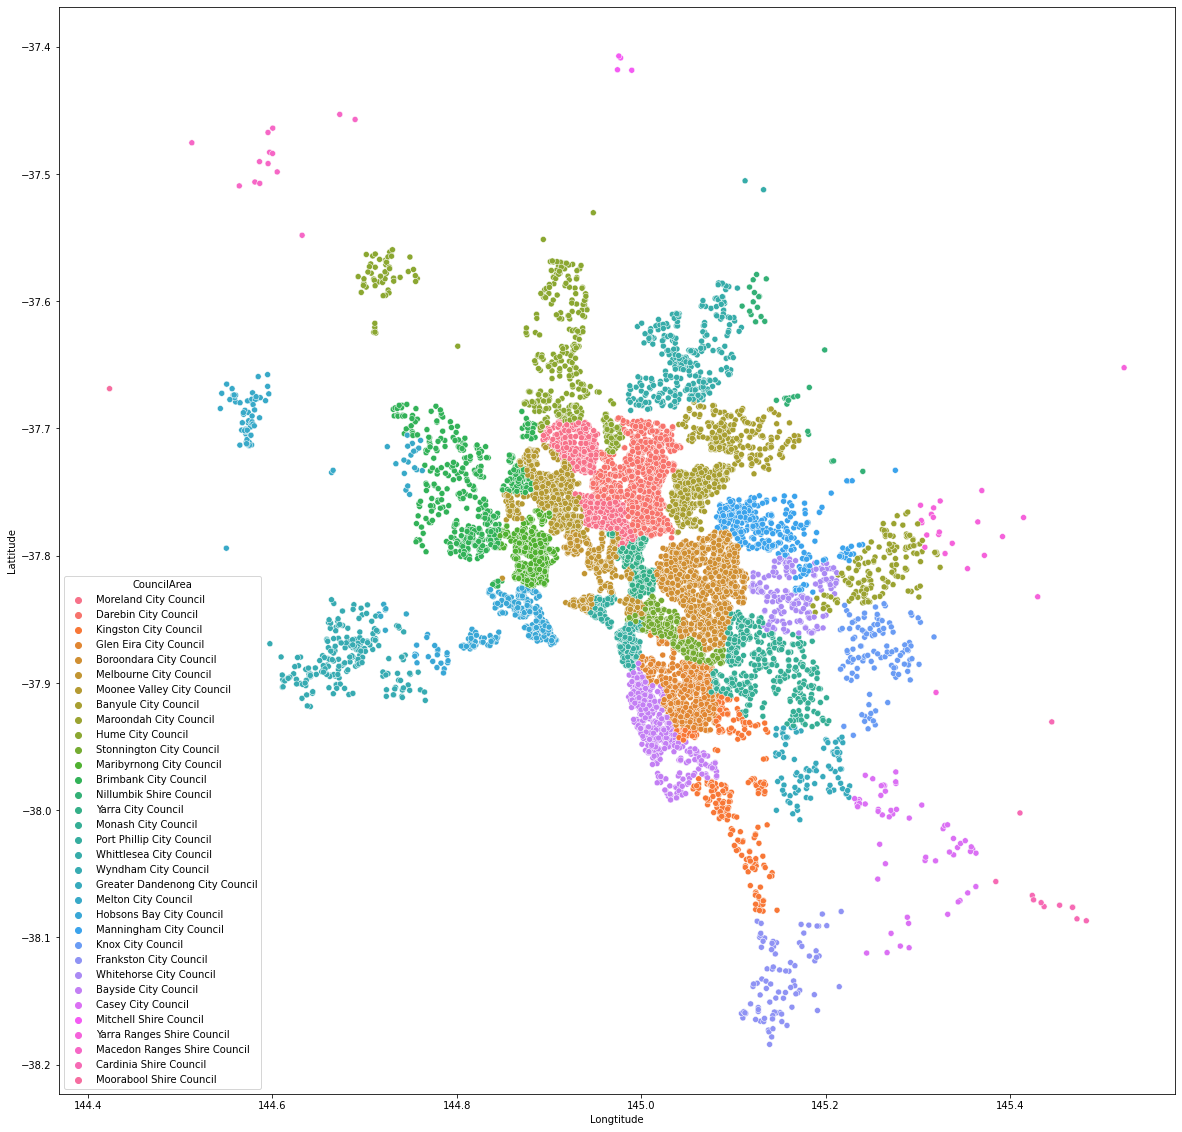

In [24]:
plt.figure(figsize=(20,20))
sns.scatterplot(x='Longtitude',y='Lattitude',hue='CouncilArea',data=train)

fill nan dựa vào CouncilArea: tọa độ của NaN là trung bình tọa độ các nhà khác có cùng CouncilArea

<AxesSubplot:xlabel='Longtitude', ylabel='Price'>

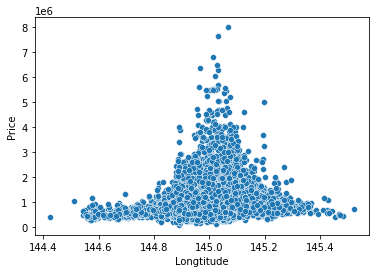

In [25]:
sns.scatterplot(x='Longtitude',y='Price',data=train)

<AxesSubplot:xlabel='Lattitude', ylabel='Price'>

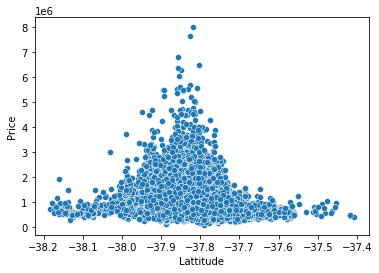

In [26]:
sns.scatterplot(x='Lattitude',y='Price',data=train)

NX: giá nhà ở trung tâm sẽ có xu hướng cao hơn

## Propertycount

In [14]:
train['Propertycount'].describe()

count    13623.000000
mean      7517.737209
std       4451.998589
min        121.000000
25%       4280.000000
50%       6567.000000
75%      10331.000000
max      21650.000000
Name: Propertycount, dtype: float64

C:\Users\XPS\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Propertycount', ylabel='Density'>

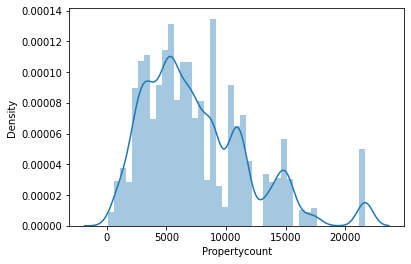

In [16]:
sns.distplot(train['Propertycount'])

<AxesSubplot:xlabel='Propertycount', ylabel='Price'>

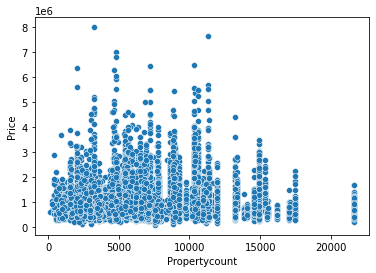

In [17]:
sns.scatterplot(x='Propertycount',y='Price',data=train)

## Date

Nhóm theo tháng

<ipython-input-18-0eb567a3734b>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train.date[train['Date']==i] = date_to_int(i)


<AxesSubplot:xlabel='date', ylabel='Price'>

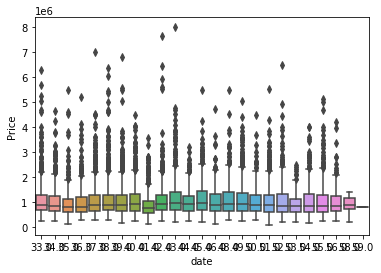

In [18]:
def date_to_int(date):
    if date[1]=='/': date = str('0') + date
    return 12-int(date[3:5])+(2020-int(date[6:]))*12

train['date'] = np.zeros(train.shape[0])

for i in train.Date.unique():
    train.date[train['Date']==i] = date_to_int(i)

sns.boxplot(x='date',y='Price',data=train)

## Rooms

<AxesSubplot:xlabel='Rooms', ylabel='Price'>

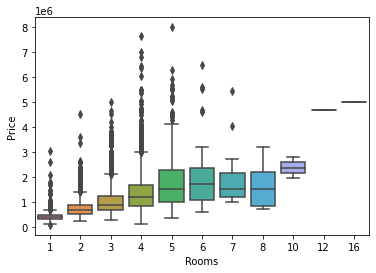

In [19]:
sns.boxplot(x='Rooms',y='Price',data=train)

nhiều phòng -> nhiều tiền

## Type

<AxesSubplot:xlabel='Type', ylabel='Price'>

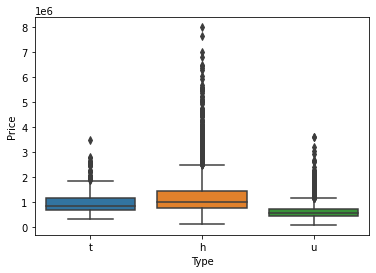

In [20]:
sns.boxplot(x='Type',y='Price',data=train)

## Method

<AxesSubplot:xlabel='Method', ylabel='Price'>

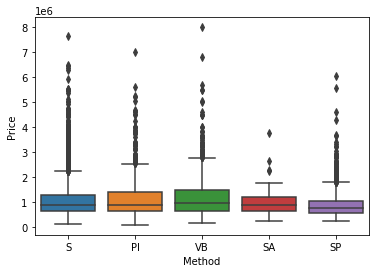

In [21]:
sns.boxplot(x='Method',y='Price',data=train)

## SellerG

<AxesSubplot:xlabel='SellerG', ylabel='Price'>

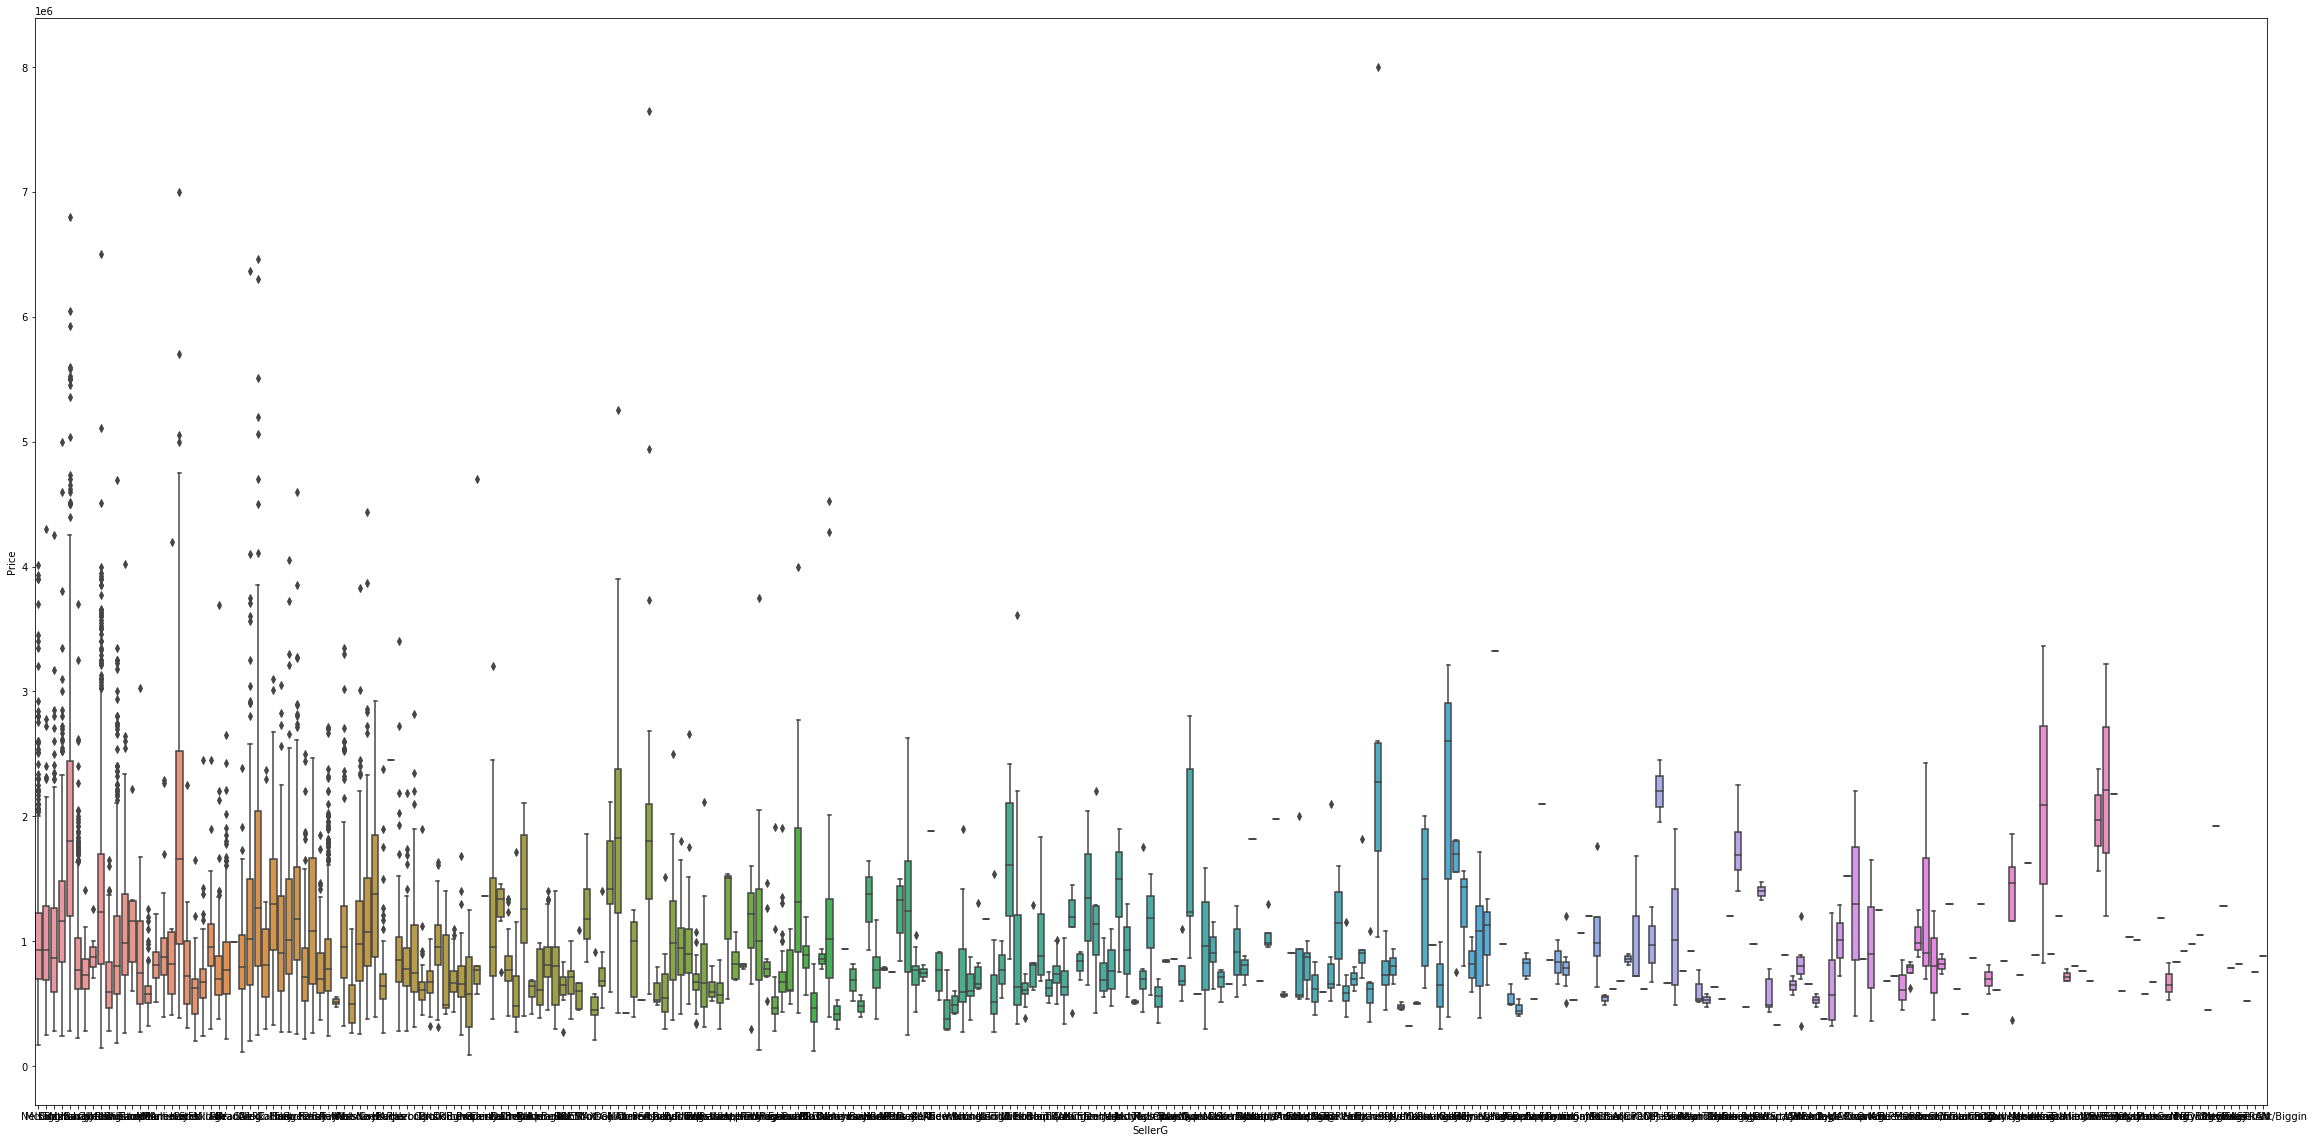

In [35]:
plt.figure(figsize=(40,20))
sns.boxplot(x='SellerG',y='Price',data=train)

có ảnh hưởng

## Distance

C:\Users\XPS\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Distance', ylabel='Density'>

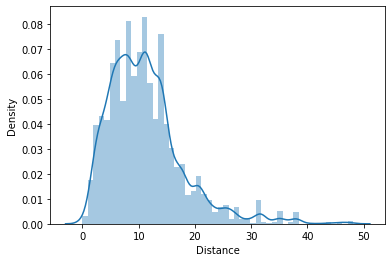

In [22]:
sns.distplot(train['Distance'])

bị skew

## Address *

In [5]:
train['Address'].head(20)

0      1/22 Archibald St
1             3 Lorna Av
2            75 Laura St
3           2 Stewart St
4         171 The Avenue
5        25/178 Power St
6           906/1 Roy St
7        5/3 Ballater St
8     101/201 Buckley St
9          7 Flinders St
10        76 Plymouth Rd
11          2A Lesley St
12          44 Stokes St
13      1/11 Brockley Rd
14       2/31 Cumming St
15           9 Harvey St
16    16/124 Caroline St
17    409/58 Kambrook Rd
18         49 Leopold St
19      2/6 Hillsdale Av
Name: Address, dtype: object

xem xét dựa trên từ cuối của address: St, Rd, Av,...

In [23]:
x = pd.DataFrame(train['Address'].str.rsplit(' ',1).tolist())
train['Address'] = x[1]

<AxesSubplot:xlabel='Address', ylabel='Price'>

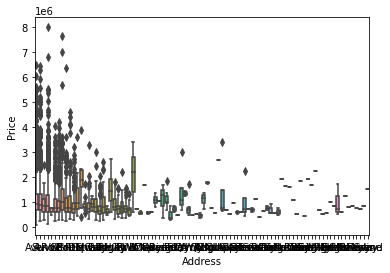

In [24]:
sns.boxplot(x='Address',y='Price',data=train)

## Landsize *

C:\Users\XPS\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Landsize', ylabel='Density'>

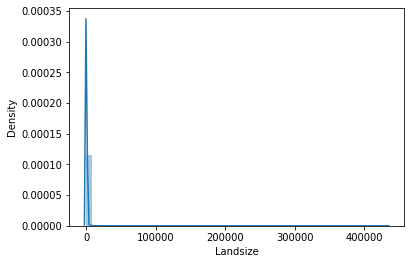

In [25]:
sns.distplot(train['Landsize'])

Có một số dữ liệu nhiễu

C:\Users\XPS\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Landsize', ylabel='Density'>

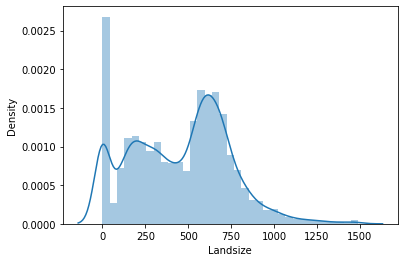

In [26]:
sns.distplot(train.Landsize[train['Landsize']<=1500])

## Correlation matrix *

<AxesSubplot:>

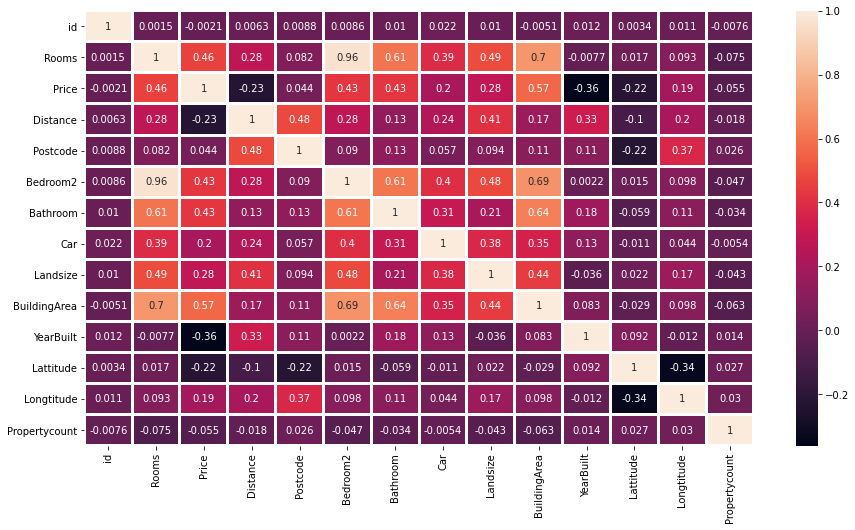

In [82]:
plt.figure(figsize=(15,8))
sns.heatmap(train.corr(), annot=True, linewidths=2)

Room vs Bedroom2 có correlation cao -> bỏ bedroom2

# Feature Engineering

## Xóa dữ liệu nhiễu

In [110]:
train = train.drop(train[ (train['BuildingArea']>=400) ].index)
train = train.drop(train[train['Landsize']>1500].index)

<AxesSubplot:xlabel='Landsize', ylabel='Price'>

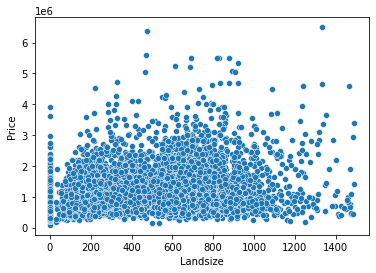

In [55]:
sns.scatterplot(x='Landsize',y='Price',data=train)

<AxesSubplot:xlabel='BuildingArea', ylabel='Price'>

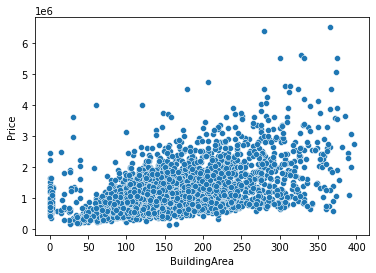

In [56]:
sns.scatterplot(x='BuildingArea',y='Price',data=train)

In [57]:
train.shape

(13356, 22)

## Gộp train và test

In [111]:
ntrain = train.shape[0]
ntest = test.shape[0]
target = train.Price.values
data = pd.concat((train, test)).reset_index(drop=True)
data.drop(['Price'], axis=1, inplace=True)
print("data size is : {}".format(data.shape))

data size is : (26980, 21)


In [112]:
data.isna().sum()

id                   0
Suburb               0
Address              0
Rooms                0
Type                 0
Method               0
SellerG              0
Date                 0
Distance             1
Postcode             1
Bedroom2          6441
Bathroom          6447
Car               6819
Landsize          9249
BuildingArea     16501
YearBuilt        15073
CouncilArea          3
Lattitude         6253
Longtitude        6253
Regionname           3
Propertycount        3
dtype: int64

## Điền dữ liệu thiếu

### Target

sử dụng log transform

In [59]:
target = np.log1p(target)

C:\Users\XPS\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

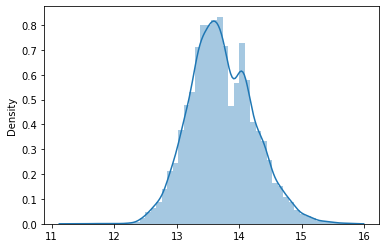

In [60]:
sns.distplot(target)

### YearBuilt

In [61]:
data.YearBuilt.fillna(value=0,inplace=True)
data['YearBuilt'] = 2020 - data['YearBuilt']

### Building Area

In [62]:
data['BuildingArea'].fillna(value=train['BuildingArea'].mean(),inplace=True)

### CouncilArea

In [63]:
data['CouncilArea'].fillna(value='None',inplace=True)

### Regionname

In [64]:
data['Regionname'].fillna(value='None',inplace=True)

### Propertycount

In [65]:
data['Propertycount'].fillna(value=train['Propertycount'].mean(),inplace=True)

### Longtitude & Lattitude

In [66]:
ca = data.CouncilArea.unique()
MeanLo = np.zeros(ca.shape)
MeanLa = np.zeros(ca.shape)
for i in ca:
    if i != 'None':
        MeanLo[ca==i] = np.mean(data.Longtitude[data['CouncilArea']==i])
        MeanLa[ca==i] = np.mean(data.Lattitude[data['CouncilArea']==i])
    else:
        MeanLo[ca==i] = np.mean(data.Longtitude)
        MeanLa[ca==i] = np.mean(data.Lattitude)

for i in ca:
    data.loc[(data['CouncilArea']==i) & (data['Longtitude'].isna()),'Longtitude'] = MeanLo[ca==i][0]
    data.loc[(data['CouncilArea']==i) & (data['Lattitude'].isna()),'Lattitude'] = MeanLa[ca==i][0]

### date

In [67]:
def date_to_int(date):
    if date[1]=='/': date = str('0') + date
    return 12-int(date[3:5])+(2020-int(date[6:]))*12

data['date'] = np.zeros(data.shape[0])

for i in data.Date.unique():
    data.date[data['Date']==i] = date_to_int(i)

data['Date'] = data['date'].copy()
data.drop(columns='date',inplace=True)

<ipython-input-67-6b0bac6ffcfd>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.date[data['Date']==i] = date_to_int(i)


### Distance

In [68]:
data['Distance'].fillna(value=data['Distance'].mean(),inplace=True)

### Bedroom2

In [69]:
data['Bedroom2'].fillna(value=0,inplace=True)

### Bathroom

In [70]:
data['Bathroom'].fillna(value=data['Bathroom'].median(),inplace=True)

### Car

In [71]:
data['Car'].fillna(value=0,inplace=True)

### Landsize

In [72]:
data['Landsize'].fillna(value=train['Landsize'].mean(),inplace=True)

### Address

In [73]:
x = pd.DataFrame(data['Address'].str.rsplit(' ',1).tolist())
data['Address'] = x[1]

### Postcode

In [75]:
data['Postcode'].fillna(value=train['Postcode'].median(),inplace=True)

In [76]:
data.isna().sum()

id               0
Suburb           0
Address          0
Rooms            0
Type             0
Method           0
SellerG          0
Date             0
Distance         0
Postcode         0
Bedroom2         0
Bathroom         0
Car              0
Landsize         0
BuildingArea     0
YearBuilt        0
CouncilArea      0
Lattitude        0
Longtitude       0
Regionname       0
Propertycount    0
dtype: int64

## Dùng standard scaler xử lý dữ liệu số

In [81]:
num_feat = ['Distance','Propertycount']
data[num_feat] = StandardScaler().fit_transform(data[num_feat])

## Drop cột không cần thiết

In [83]:
datax = data.drop(columns=['id','Postcode','Bedroom2'])

## Mean encoding

In [ ]:
Type_mean_encoded = train.groupby(['Type'])['Price'].mean().to_dict()
data['Type'] = data['Type'].map(Type_mean_encoded)

In [ ]:
SellerG_mean_encoded = train.groupby(['SellerG'])['Price'].mean().to_dict()
data['SellerG'] = data['SellerG'].map(SellerG_mean_encoded)

In [ ]:
CouncilArea_mean_encoded = train.groupby(['CouncilArea'])['Price'].mean().to_dict()
data['CouncilArea'] = data['CouncilArea'].map(CouncilArea_mean_encoded)

In [ ]:
Regionname_mean_encoded = train.groupby(['Regionname'])['Price'].mean().to_dict()
data['Regionname'] = data['Regionname'].map(Regionname_mean_encoded)

## one hot encoding

In [84]:
datax = pd.get_dummies(data=datax)

In [87]:
datax.shape

(26980, 476)

In [88]:
train_set = datax[:ntrain]
test_set = datax[ntrain:]

# Modeling & Evaluation

In [89]:
X_train, X_valid, y_train, y_valid = train_test_split(train_set, target, test_size=0.2)

## Catboost

In [94]:
model = catboost.CatBoostRegressor(loss_function='RMSE', depth= 6, iterations= 1500, learning_rate= 0.1, l2_leaf_reg= 0.2)

model.fit(X_train,y_train)
# model.fit(train_set,target)

y_pred = model.predict(X_valid)
mean_squared_error(y_valid,y_pred,squared=False)

0:	learn: 0.4780811	total: 267ms	remaining: 6m 40s
1:	learn: 0.4499130	total: 290ms	remaining: 3m 37s
2:	learn: 0.4244939	total: 305ms	remaining: 2m 32s
3:	learn: 0.4017576	total: 335ms	remaining: 2m 5s
4:	learn: 0.3819685	total: 348ms	remaining: 1m 44s
5:	learn: 0.3639120	total: 357ms	remaining: 1m 28s
6:	learn: 0.3485418	total: 367ms	remaining: 1m 18s
7:	learn: 0.3357115	total: 378ms	remaining: 1m 10s
8:	learn: 0.3235238	total: 386ms	remaining: 1m 3s
9:	learn: 0.3124932	total: 396ms	remaining: 59s
10:	learn: 0.3033568	total: 404ms	remaining: 54.7s
11:	learn: 0.2959308	total: 413ms	remaining: 51.2s
12:	learn: 0.2884919	total: 424ms	remaining: 48.4s
13:	learn: 0.2820704	total: 431ms	remaining: 45.8s
14:	learn: 0.2763327	total: 443ms	remaining: 43.9s
15:	learn: 0.2714185	total: 451ms	remaining: 41.8s
16:	learn: 0.2665533	total: 460ms	remaining: 40.1s
17:	learn: 0.2629786	total: 473ms	remaining: 38.9s
18:	learn: 0.2590916	total: 482ms	remaining: 37.5s
19:	learn: 0.2553838	total: 496ms	re

0.1827407325032703

### Bấm đây để xem kq

In [95]:
train_dataset = catboost.Pool(X_train, y_train) 
test_dataset = catboost.Pool(X_valid, y_valid)

In [98]:
model = catboost.CatBoostRegressor(loss_function='RMSE')
grid = {'learning_rate': [0.03, 0.1],
        'depth': [2, 4, 6, 8],
        'l2_leaf_reg': [0.2, 0.5, 1, 3]}
model.grid_search(grid, train_dataset)

Custom logger is already specified. Specify more than one logger at same time is not thread safe.

0:	learn: 13.3211089	test: 13.3044841	best: 13.3044841 (0)	total: 2.89ms	remaining: 576ms
1:	learn: 12.9219636	test: 12.9056756	best: 12.9056756 (1)	total: 6.84ms	remaining: 678ms
2:	learn: 12.5349039	test: 12.5187052	best: 12.5187052 (2)	total: 9.32ms	remaining: 612ms
3:	learn: 12.1595102	test: 12.1433217	best: 12.1433217 (3)	total: 11.6ms	remaining: 568ms
4:	learn: 11.7953746	test: 11.7791209	best: 11.7791209 (4)	total: 14ms	remaining: 545ms
5:	learn: 11.4421337	test: 11.4258983	best: 11.4258983 (5)	total: 16.3ms	remaining: 526ms
6:	learn: 11.0995567	test: 11.0834026	best: 11.0834026 (6)	total: 29.9ms	remaining: 824ms
7:	learn: 10.7671453	test: 10.7513760	best: 10.7513760 (7)	total: 32.9ms	remaining: 789ms
8:	learn: 10.4448596	test: 10.4291043	best: 10.4291043 (8)	total: 37.7ms	remaining: 800ms
9:	learn: 10.1322400	test: 10.1164642	best: 10.1164642 (9)	total: 40.7ms	remaining: 773ms
10:	learn: 9.8290455	test: 9.8132454	best: 9.8132454 (10)	total: 43.8ms	remaining: 752ms
11:	learn: 9.

{'params': {'depth': 4,
  'iterations': 200,
  'learning_rate': 0.1,
  'l2_leaf_reg': 0.2},
 'cv_results': defaultdict(list,
             {'iterations': [0,
               1,
               2,
               3,
               4,
               5,
               6,
               7,
               8,
               9,
               10,
               11,
               12,
               13,
               14,
               15,
               16,
               17,
               18,
               19,
               20,
               21,
               22,
               23,
               24,
               25,
               26,
               27,
               28,
               29,
               30,
               31,
               32,
               33,
               34,
               35,
               36,
               37,
               38,
               39,
               40,
               41,
               42,
               43,
               44,
               4

# Predict & write submission file

In [104]:
predicted_X_test = model.predict(test_set)
predicted_X_test = np.expm1(predicted_X_test)
my_submission = pd.DataFrame({'id': test.id, 'Price': predicted_X_test})
my_submission.to_csv('./cb_houseprice_submission.csv', index=False)